In [1]:
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

In [2]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
#plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = [20, 5]

In [3]:
import pickle
with open('example_data.pkl', 'rb') as f:
    example_data = pickle.load(f)

In [4]:
example_data

{11.0: {'raw_x': 19.852252186522943,
  'raw_y': 0.26800244537239765,
  'class_index': 3.0,
  'TTE': array([15.6113591]),
  'EP': array([-4.12910711]),
  'filter_pred_x': array([22.1937792]),
  'filter_pred_y': array([-0.01622516]),
  'filter_pred_dxdt': array([-1.42164299]),
  'filter_pred_dydt': array([-0.26449376]),
  'dangerous': False},
 2.0: {'raw_x': 12.321390698743176,
  'raw_y': -0.28230097838182483,
  'class_index': 3.0,
  'TTE': array([9.0636828]),
  'EP': array([-1.85899528]),
  'filter_pred_x': array([13.46371912]),
  'filter_pred_y': array([-0.47004079]),
  'filter_pred_dxdt': array([-1.48545789]),
  'filter_pred_dydt': array([-0.20510374]),
  'dangerous': True},
 22.0: {'raw_x': -36.48544073729178,
  'raw_y': -0.925535473467351,
  'class_index': 3.0,
  'TTE': array([27.97908454]),
  'EP': array([5.23759465]),
  'filter_pred_x': array([-40.30615578]),
  'filter_pred_y': array([-0.89450009]),
  'filter_pred_dxdt': array([1.44058165]),
  'filter_pred_dydt': array([0.18719678

In [5]:
class_name = [
    'BICYCLE',
    'BUS',
    'CAR',
    'CYCLIST',
    'MOTORCYCLE',
    'PEDESTRIAN',
    'TRUCK'
]
    

In [6]:
class_marker_shape = {
    'BICYCLE': '8',
    'BUS': 'p',
    'CAR': 'X',
    'CYCLIST': 'o',
    'MOTORCYCLE': 'D',
    'PEDESTRIAN': '*',
    'TRUCK': 'v',
}

TypeError: __init__() got an unexpected keyword argument 'width'

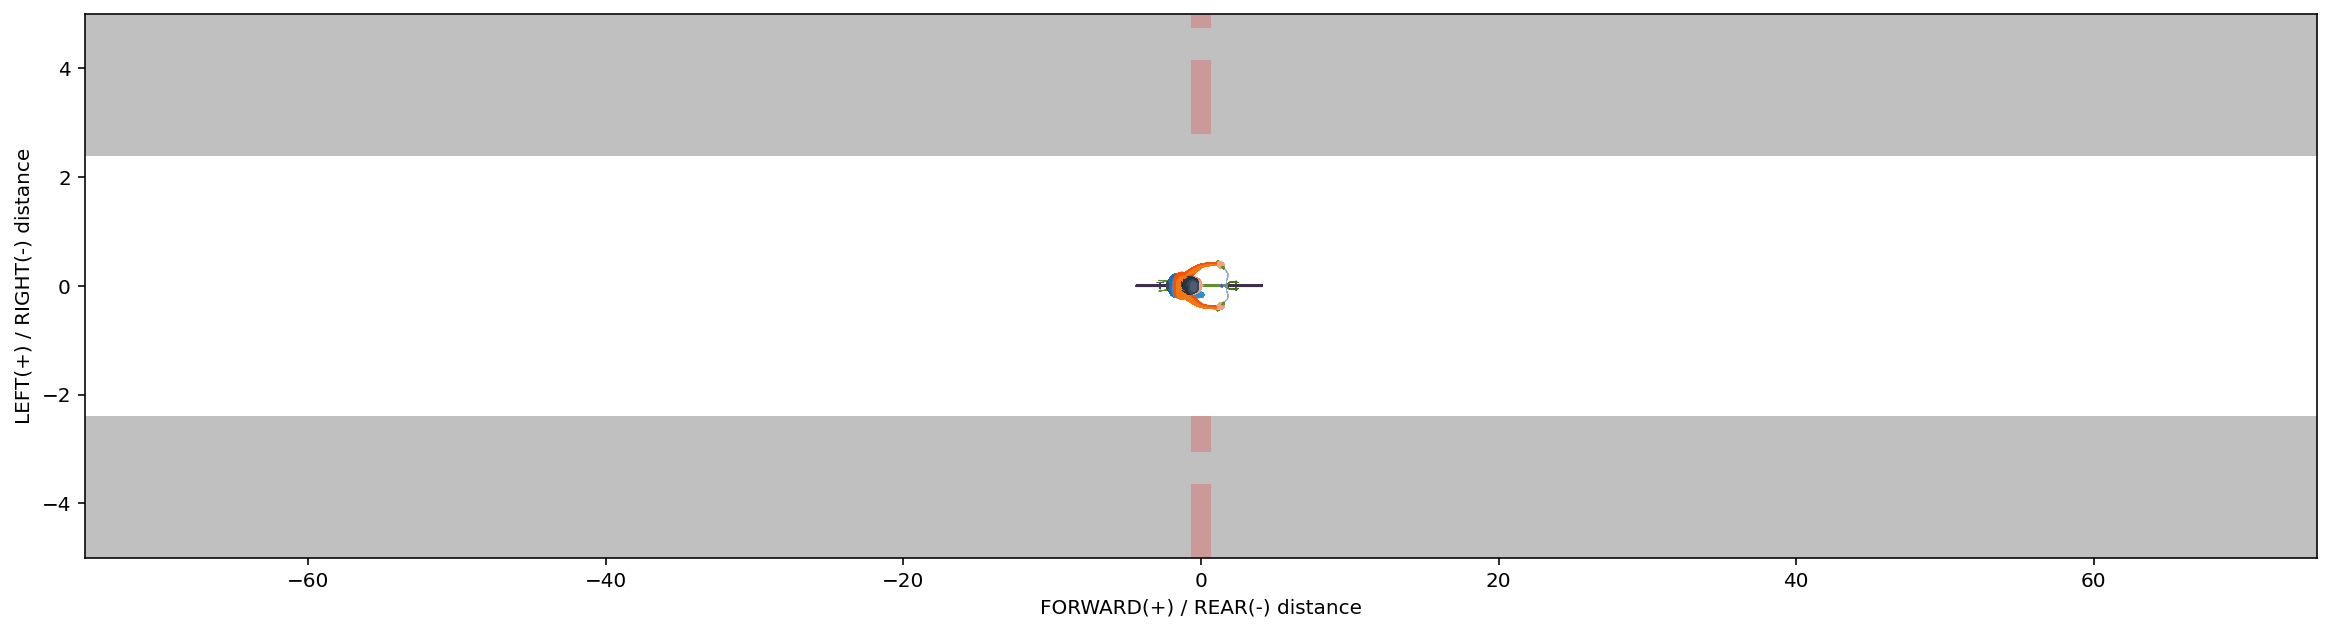

In [7]:
cyclist_img = mpimg.imread('cyclist-top.png')
imagebox = OffsetImage(cyclist_img, zoom=0.08)

ab = AnnotationBbox(imagebox, (0.0, 0.0), frameon=False)


fig, ax = plt.subplots()
plt.axis([-75,75,-5,5])
plt.xlabel('FORWARD(+) / REAR(-) distance')
plt.ylabel('LEFT(+) / RIGHT(-) distance')
ax.set_facecolor('silver')

ax.add_artist(ab)

# vertical line representing overtake line
plt.axline((0,0),(0,1), alpha=0.2, color='red', linestyle='--', linewidth=10)

# horizontal line representing road
plt.axline((0,0),(1,0), alpha=1.0, color='white', linestyle='-', linewidth=130)

for track_id in example_data:
    point = example_data[track_id]
    filter_x = point['filter_pred_x'][0]
    filter_y = point['filter_pred_y'][0]
    filter_dxdt = point['filter_pred_dxdt'][0]
    filter_dydt = point['filter_pred_dydt'][0]
    
    # filter predictions arrow
    prop = dict(arrowstyle=f"-|>,head_width=1,head_length=1,width=0.5", shrinkA=0, shrinkB=0)
    plt.annotate("", 
                 xy=(2*filter_dxdt,2*filter_dydt), 
                 xytext=(filter_x, filter_y), 
                 arrowprops=prop,
                 zorder=999)
    
    plt.arrow(
        filter_x, 
        filter_y, 
        3*filter_dxdt, 
        3*filter_dydt, 
        width=0.5, 
        head_width=1.5, 
        head_length=1.5, 
        alpha=0.6, 
        fill=True,
        color = 'orangered' if point['dangerous'] else 'skyblue',
        zorder=999)
    
    # text on  filter prediction arrow
    plt.plot(
        filter_x, 
        filter_y, 
        color = 'orangered' if point['dangerous'] else 'skyblue',
        marker=class_marker_shape[class_name[int(point['class_index'])]],
        markersize=15.0,
        alpha=0.6
    )
    
    # 'CYCLIST 11' text
    plt.annotate(
        f"{class_name[int(point['class_index'])]} {int(track_id)}",
        (filter_x-3, filter_y+2),
        fontweight=600,
        fontsize=15.0,
        alpha=0.8
    )
    
    # TTE text
    plt.annotate(
        f"{round(point['TTE'][0],1)}s away",
        (filter_x-2.5, filter_y-3),
        fontweight=400,
        fontsize=15.0,
        alpha=0.8,
    )
    
    # raw current point
    plt.plot(
        point['raw_x'],
        point['raw_y'],
        color = 'maroon' if point['dangerous'] else 'steelblue',
        marker=class_marker_shape[class_name[int(point['class_index'])]],
        markersize=20.0,
        alpha=0.9
    )
        
